# **라이브러리**

In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# **함수모음**

## **모델링**

In [2]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.5)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

## **스코어**

In [3]:
def scoring(y_true, y_pred):
    print('accuracy:', accuracy_score(y_true,y_pred))
    print('f1-Score:', f1_score(y_true, y_pred, average='macro'))
    print('Recall:',recall_score(y_true, y_pred, average='macro'))
    print('Precision:',precision_score(y_true, y_pred, average='macro'))
    print(confusion_matrix(y_true, y_pred))

# **데이터 나누기**

In [5]:
# dataset = pd.read_csv(r'..\..\..\Code\JH\data\0y_finan.csv')
# dataset1 = pd.read_csv(r'..\..\..\Code\JH\data\1y_finan.csv')
# dataset2 = pd.read_csv(r'..\..\..\Code\JH\data\2y_finan.csv')

# dataset.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도'],
      dtype='object')

In [4]:
dataset = pd.read_csv(r'..\..\..\Code\SH\csv\step3\dataset_step3.csv', index_col=0)
dataset1 = pd.read_csv(r'..\..\..\Code\SH\csv\step3\dataset1_step3.csv')
dataset2 = pd.read_csv(r'..\..\..\Code\SH\csv\step3\dataset2_step3.csv')
dataset3 = pd.read_csv(r'..\..\..\Code\SH\csv\step3\dataset3_step3.csv')
dataset4 = pd.read_csv(r'..\..\..\Code\SH\csv\step3\dataset4_step3.csv')

In [5]:
def splittrain(data):
    subdata = data.sort_values(by='년').reset_index(drop=True)
    data = subdata.loc[subdata['년'] < 2015]
    return data

def splittesst(data):
    global test
    subdata = data.sort_values(by='년').reset_index(drop=True)
    test = subdata.loc[subdata['년'] >= 2015]
    return test

In [6]:
dataset_ = splittrain(dataset)
test_ = splittesst(dataset)
dataset1_ = splittrain(dataset1)
test1_ = splittesst(dataset1)
dataset2_ = splittrain(dataset2)
test2_ = splittesst(dataset2)
dataset3_ = splittrain(dataset3)
test3_ = splittesst(dataset3)
dataset4_ = splittrain(dataset4)
test4_ = splittesst(dataset4)


In [7]:
drop_feature = ['회사명', '거래소코드', '회계년도','년', 'key', '부도']

In [8]:
X = dataset_.drop(drop_feature, axis=1)
X1 = dataset1_.drop(drop_feature, axis=1)
X2 = dataset2_.drop(drop_feature, axis=1)
X3 = dataset3_.drop(drop_feature, axis=1)
X4 = dataset4_.drop(drop_feature, axis=1)

y = dataset_['부도']
y1 = dataset1_['부도']
y2 = dataset2_['부도']
y3 = dataset1_['부도']
y4 = dataset2_['부도']

In [9]:
X_test =test_.drop(drop_feature, axis=1)
X1_test =test1_.drop(drop_feature, axis=1)
X2_test =test2_.drop(drop_feature, axis=1)
X3_test =test3_.drop(drop_feature, axis=1)
X4_test =test4_.drop(drop_feature, axis=1)

y_test= test_['부도']
y1_test =test1_['부도']
y2_test =test2_['부도']
y3_test =test3_['부도']
y4_test =test4_['부도']

# **YEAR**

In [12]:
X

,Unnamed: 0,설비투자효율,총자본투자효율,부채구성비율,비유동장기적합률,재고자산보유기간,매출채권회수기간,매입채무회전률,경영자본회전률,경영자본순이익률,...,회계처리위반,횡령배임,영업조업중단,종가변동률,출자목적_투자,출자목적_경영권,출자목적_영업이익,신종채권_운영,신종채권_시설,신종채권_기타
0,0,0.00,0.00,55.519145,0.00,0.000000,0.000000,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,8284,0.00,0.00,46.472475,0.00,0.000000,0.000000,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,21291,594.67,19.39,23.561363,31.87,14.717742,73.886640,31.71,1.16,12.76,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,8293,0.00,0.00,47.948294,0.00,0.000000,0.000000,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,8298,0.00,0.00,49.133517,0.00,0.000000,0.000000,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18323,15236,7.16,1.80,56.507525,90.87,76.359833,74.338086,13.22,1.12,-6.03,...,0.0,0.0,0.0,-0.419094,8.0,8.0,8.0,0.0,0.0,0.0
18324,15415,53.08,8.19,30.932592,52.70,167.431193,190.104167,15.04,0.41,-2.02,...,0.0,0.0,0.0,0.077381,4.0,4.0,4.0,0.0,0.0,0.0
18325,460,188.83,21.20,13.311606,53.77,0.000000,63.811189,114.14,1.70,21.06,...,0.0,0.0,0.0,0.451662,0.0,0.0,0.0,0.0,0.0,0.0
18326,4629,226.27,19.03,11.804468,26.66,90.796020,54.477612,17.84,0.83,14.51,...,0.0,0.0,0.0,-0.248227,50.0,50.0,50.0,0.0,0.0,0.0


In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 488)
X_train , y_train = RandomUnderSampler(random_state=0).fit_resample(X , y)

In [11]:
dt_clf = modeling(DecisionTreeClassifier(), X_train, y_train, X_test)
rf_clf = modeling(RandomForestClassifier(),X_train, y_train, X_test)
ada_clf = modeling(AdaBoostClassifier(), X_train, y_train, X_test)
lg_clf = modeling(LogisticRegression(), X_train, y_train, X_test)
knn_clf = modeling(KNeighborsClassifier(), X_train, y_train, X_test)
svc_clf = modeling(SVC(probability=True), X_train, y_train, X_test)
lgmb_clf = modeling(LGBMClassifier(), X_train, y_train, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X_train, y_train, X_test)
mlp_clf = modeling(MLPClassifier(),X_train, y_train, X_test)
xgb_clf = modeling(XGBClassifier(),X_train, y_train, X_test)

LightGBMError: Do not support special JSON characters in feature name.

In [14]:
scoring(y_test , cat_clf)

accuracy: 0.8150218340611354
f1-Score: 0.4755561426176922
Recall: 0.8129300186262212
Precision: 0.5131093933068802
[[4636 1052]
 [   7   30]]


# **1YEAR AGO**

In [15]:
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state = 488)
X1_train , y1_train = RandomUnderSampler(random_state=0).fit_resample(X1 , y1)

In [16]:
dt_clf1 = modeling(DecisionTreeClassifier(), X1_train, y1_train, X1_test)
rf_clf1 = modeling(RandomForestClassifier(),X1_train, y1_train, X1_test)
ada_clf1 = modeling(AdaBoostClassifier(), X1_train, y1_train, X1_test)
lg_clf1 = modeling(LogisticRegression(), X1_train, y1_train, X1_test)
knn_clf1 = modeling(KNeighborsClassifier(), X1_train, y1_train, X1_test)
svc_clf1 = modeling(SVC(probability=True), X1_train, y1_train, X1_test)
lgmb_clf1 = modeling(LGBMClassifier(), X1_train, y1_train, X1_test)
cat_clf1 = modeling(CatBoostClassifier(silent=True),X1_train, y1_train, X1_test)
mlp_clf1 = modeling(MLPClassifier(),X1_train, y1_train, X1_test)
xgb_clf1 = modeling(XGBClassifier(),X1_train, y1_train, X1_test)

[18:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
scoring(y1_test , cat_clf1)

accuracy: 0.7149344978165939
f1-Score: 0.4296396899279321
Recall: 0.7802448472741507
Precision: 0.5061758691206544
[[4071 1628]
 [   4   22]]


# **2YEARS AGO**

In [18]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state = 488)
X2_train , y2_train = RandomUnderSampler(random_state=0).fit_resample(X2 , y2)

In [19]:
dt_clf2 = modeling(DecisionTreeClassifier(), X2_train, y2_train, X2_test)
rf_clf2 = modeling(RandomForestClassifier(),X2_train, y2_train, X2_test)
ada_clf2 = modeling(AdaBoostClassifier(), X2_train, y2_train, X2_test)
lg_clf2 = modeling(LogisticRegression(), X2_train, y2_train, X2_test)
knn_clf2 = modeling(KNeighborsClassifier(), X2_train, y2_train, X2_test)
svc_clf2 = modeling(SVC(probability=True), X2_train, y2_train, X2_test)
lgmb_clf2 = modeling(LGBMClassifier(), X2_train, y2_train, X2_test)
cat_clf2 = modeling(CatBoostClassifier(silent=True),X2_train, y2_train, X2_test)
mlp_clf2 = modeling(MLPClassifier(),X2_train, y2_train, X2_test)
xgb_clf2 = modeling(XGBClassifier(),X2_train, y2_train, X2_test)

[18:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [20]:
scoring(y2_test , cat_clf2)

accuracy: 0.6620087336244541
f1-Score: 0.40563042489748785
Recall: 0.7058501314636284
Precision: 0.5031946654697298
[[3775 1930]
 [   5   15]]


# **3YEARS AGO**

In [141]:
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state = 488)
X3_train , y3_train = RandomUnderSampler(random_state=0).fit_resample(X3 , y3)

dt_clf3 = modeling(DecisionTreeClassifier(), X3_train, y3_train, X3_test)
rf_clf3 = modeling(RandomForestClassifier(),X3_train, y3_train, X3_test)
ada_clf3 = modeling(AdaBoostClassifier(), X3_train, y3_train, X3_test)
lg_clf3 = modeling(LogisticRegression(), X3_train, y3_train, X3_test)
knn_clf3 = modeling(KNeighborsClassifier(), X3_train, y3_train, X3_test)
svc_clf3 = modeling(SVC(probability=True), X3_train, y3_train, X3_test)
lgmb_clf3 = modeling(LGBMClassifier(), X3_train, y3_train, X3_test)
cat_clf3 = modeling(CatBoostClassifier(silent=True),X3_train, y3_train, X3_test)
mlp_clf3 = modeling(MLPClassifier(),X3_train, y3_train, X3_test)
xgb_clf3 = modeling(XGBClassifier(),X3_train, y3_train, X3_test)

[16:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [142]:
scoring(y3_test , cat_clf3)

accuracy: 0.6000705550329257
f1-Score: 0.3815436851040985
Recall: 0.6634238739657226
Precision: 0.5026284465997967
[[5079 3392]
 [   9   24]]


# **4YEARS AGO**

In [143]:
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, stratify=y4, random_state = 488)
X4_train , y4_train = RandomUnderSampler(random_state=0).fit_resample(X4 , y4)

dt_clf4 = modeling(DecisionTreeClassifier(), X4_train, y4_train, X4_test)
rf_clf4 = modeling(RandomForestClassifier(),X4_train, y4_train, X4_test)
ada_clf4 = modeling(AdaBoostClassifier(), X4_train, y4_train, X4_test)
lg_clf4 = modeling(LogisticRegression(), X4_train, y4_train, X4_test)
knn_clf4 = modeling(KNeighborsClassifier(), X4_train, y4_train, X4_test)
svc_clf4 = modeling(SVC(probability=True), X4_train, y4_train, X4_test)
lgmb_clf4 = modeling(LGBMClassifier(), X4_train, y4_train, X4_test)
cat_clf4 = modeling(CatBoostClassifier(silent=True),X4_train, y4_train, X4_test)
mlp_clf4 = modeling(MLPClassifier(),X4_train, y4_train, X4_test)
xgb_clf4 = modeling(XGBClassifier(),X4_train, y4_train, X4_test)

[16:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [144]:
scoring(y4_test , cat_clf4)

accuracy: 0.644167450611477
f1-Score: 0.39615646094722873
Recall: 0.6402756639729053
Precision: 0.5015777129719637
[[5464 3018]
 [   8   14]]


<BarContainer object of 16 artists>

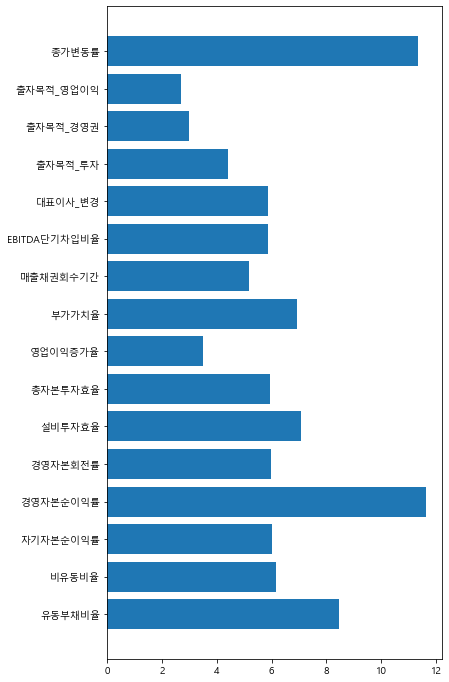

In [191]:
plt.barh(ajX_train.columns, model.feature_importances_ )